In [6]:
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

notebook_path = 'path\\to\\where\\inputfiles\\are'

num_classes = 8
input_shape = (225, 1)
num_splits = 3
batch_size  = 32
epochs = 1000

#define per-fold score containers
acc_per_fold = []
loss_per_fold = []

#will hold the history of a single split's accuracy
all_history = [0 for i in range(num_splits)]

trainin = open(notebook_path+'all_trainin.txt', 'r') #already appended with bias value
trainout = open(notebook_path+'all_trainout_8.txt', 'r')
testin = open(notebook_path+'all_testin.txt', 'r')
testout = open(notebook_path+'all_testout_8.txt', 'r')

trainin_matrix = np.zeros((0, 225))
trainout_matrix = np.zeros((0, 8))
testin_matrix = np.zeros((0, 225))
testout_matrix = np.zeros((0, 8))

while True:
    inline = trainin.readline()
    outline = trainout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    trainin_matrix = np.append(trainin_matrix,[in_num], axis=0)
    trainout_matrix = np.append(trainout_matrix,[out_num], axis=0)

while True:
    inline = testin.readline()
    outline = testout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    testin_matrix = np.append(testin_matrix,[in_num], axis=0)
    testout_matrix = np.append(testout_matrix,[out_num], axis=0)

trainin_matrix = trainin_matrix.reshape(trainin_matrix.shape[0],trainin_matrix.shape[1], 1, 1)
testin_matrix = testin_matrix.reshape(testin_matrix.shape[0],testin_matrix.shape[1], 1, 1)

print(trainin_matrix.shape)
print(trainout_matrix.shape)
print(testin_matrix.shape)
print(testout_matrix.shape)

#merge inputs and targets
inputs = np.concatenate((trainin_matrix, testin_matrix), axis=0)
targets = np.concatenate((trainout_matrix, testout_matrix), axis=0)

print(inputs.shape)
print(targets.shape)

#define the K-fold Cross Validator
kfold = KFold(n_splits=num_splits, shuffle=True)

(2346, 225, 1, 1)
(2346, 8)
(807, 225, 1, 1)
(807, 8)
(3153, 225, 1, 1)
(3153, 8)


In [7]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv1D(32, kernel_size=3, activation="relu", use_bias=False),
            layers.MaxPooling1D(pool_size=2),
            layers.Conv1D(64, kernel_size=3, activation="relu", use_bias=False),
            layers.MaxPooling1D(pool_size=2),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    #model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(inputs[train], targets[train], batch_size=batch_size, epochs=epochs, validation_split=0.1)
    
    all_history[fold_no-1] = history
    
    score = model.evaluate(inputs[test], targets[test], verbose=0)

    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
    acc_per_fold.append(score[1] * 100)
    loss_per_fold.append(score[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/1000
60/60 [==============================] - 3s 9ms/step - loss: 1.9170 - accuracy: 0.2485 - val_loss: 2.1842 - val_accuracy: 0.1422
Epoch 2/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.7600 - accuracy: 0.3173 - val_loss: 2.2333 - val_accuracy: 0.1422
Epoch 3/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.7075 - accuracy: 0.3226 - val_loss: 2.3796 - val_accuracy: 0.1422
Epoch 4/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.6897 - accuracy: 0.3242 - val_loss: 2.3540 - val_accuracy: 0.1422
Epoch 5/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.6753 - accuracy: 0.3226 - val_loss: 2.4484 - val_accuracy: 0.1422
Epoch 6/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.6674 - accuracy: 0.3284 - val_loss: 2.4316 - val_accuracy: 0.1422
Epoch 7/1000
60/60 [==============================] - 1s 9ms/step - loss: 1.6637 - accuracy: 0.3263 - val_loss: 2.5295 - val_accuracy: 0.1422
Epoch 

60/60 [==============================] - 0s 6ms/step - loss: 1.4266 - accuracy: 0.4410 - val_loss: 2.5006 - val_accuracy: 0.1422
Epoch 116/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4239 - accuracy: 0.4389 - val_loss: 2.4635 - val_accuracy: 0.1469
Epoch 117/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4228 - accuracy: 0.4384 - val_loss: 2.4942 - val_accuracy: 0.1517
Epoch 118/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4119 - accuracy: 0.4395 - val_loss: 2.4726 - val_accuracy: 0.1611
Epoch 119/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4156 - accuracy: 0.4395 - val_loss: 2.5696 - val_accuracy: 0.1564
Epoch 120/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4214 - accuracy: 0.4437 - val_loss: 2.4805 - val_accuracy: 0.1564
Epoch 121/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4220 - accuracy: 0.4395 - val_loss: 2.4505 - val_accuracy: 0.1469
Epoch 1

Epoch 172/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3928 - accuracy: 0.4437 - val_loss: 2.7148 - val_accuracy: 0.1611
Epoch 173/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3922 - accuracy: 0.4447 - val_loss: 2.6977 - val_accuracy: 0.1943
Epoch 174/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.4595 - val_loss: 2.6468 - val_accuracy: 0.1706
Epoch 175/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3768 - accuracy: 0.4622 - val_loss: 2.7169 - val_accuracy: 0.1659
Epoch 176/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3978 - accuracy: 0.4506 - val_loss: 2.7568 - val_accuracy: 0.1801
Epoch 177/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3970 - accuracy: 0.4527 - val_loss: 2.6336 - val_accuracy: 0.1517
Epoch 178/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3963 - accuracy: 0.4521 - val_loss: 2.8164 - val_accuracy:

Epoch 229/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3641 - accuracy: 0.4701 - val_loss: 2.9626 - val_accuracy: 0.1706
Epoch 230/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3695 - accuracy: 0.4580 - val_loss: 2.8654 - val_accuracy: 0.1517
Epoch 231/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3831 - accuracy: 0.4601 - val_loss: 2.8499 - val_accuracy: 0.1517
Epoch 232/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3693 - accuracy: 0.4500 - val_loss: 2.9030 - val_accuracy: 0.1611
Epoch 233/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3615 - accuracy: 0.4585 - val_loss: 2.8602 - val_accuracy: 0.1611
Epoch 234/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3623 - accuracy: 0.4564 - val_loss: 2.9345 - val_accuracy: 0.1659
Epoch 235/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3608 - accuracy: 0.4617 - val_loss: 3.0086 - val_accuracy:

Epoch 286/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3491 - accuracy: 0.4696 - val_loss: 3.0550 - val_accuracy: 0.1991
Epoch 287/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3595 - accuracy: 0.4611 - val_loss: 3.1636 - val_accuracy: 0.1659
Epoch 288/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3588 - accuracy: 0.4601 - val_loss: 3.1575 - val_accuracy: 0.1896
Epoch 289/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3567 - accuracy: 0.4707 - val_loss: 3.1484 - val_accuracy: 0.1896
Epoch 290/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3620 - accuracy: 0.4606 - val_loss: 3.0923 - val_accuracy: 0.1943
Epoch 291/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3585 - accuracy: 0.4691 - val_loss: 3.0943 - val_accuracy: 0.1943
Epoch 292/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3614 - accuracy: 0.4617 - val_loss: 2.9948 - val_accuracy:

Epoch 343/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3486 - accuracy: 0.4802 - val_loss: 3.4874 - val_accuracy: 0.2133
Epoch 344/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3500 - accuracy: 0.4627 - val_loss: 3.4719 - val_accuracy: 0.1896
Epoch 345/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3428 - accuracy: 0.4707 - val_loss: 3.2760 - val_accuracy: 0.1943
Epoch 346/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3332 - accuracy: 0.4738 - val_loss: 3.2896 - val_accuracy: 0.1943
Epoch 347/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3445 - accuracy: 0.4627 - val_loss: 3.3954 - val_accuracy: 0.1896
Epoch 348/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3402 - accuracy: 0.4648 - val_loss: 3.3988 - val_accuracy: 0.1896
Epoch 349/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3395 - accuracy: 0.4786 - val_loss: 3.3817 - val_accuracy:

Epoch 400/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3380 - accuracy: 0.4828 - val_loss: 3.6468 - val_accuracy: 0.1896
Epoch 401/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3501 - accuracy: 0.4590 - val_loss: 3.5139 - val_accuracy: 0.1848
Epoch 402/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3407 - accuracy: 0.4680 - val_loss: 3.5851 - val_accuracy: 0.1896
Epoch 403/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3456 - accuracy: 0.4770 - val_loss: 3.6057 - val_accuracy: 0.1706
Epoch 404/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3351 - accuracy: 0.4818 - val_loss: 3.4398 - val_accuracy: 0.1754
Epoch 405/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3313 - accuracy: 0.4632 - val_loss: 3.4431 - val_accuracy: 0.1943
Epoch 406/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3349 - accuracy: 0.4622 - val_loss: 3.5556 - val_accuracy:

Epoch 457/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3238 - accuracy: 0.4849 - val_loss: 3.7678 - val_accuracy: 0.1848
Epoch 458/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3324 - accuracy: 0.4712 - val_loss: 3.7832 - val_accuracy: 0.1991
Epoch 459/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3326 - accuracy: 0.4754 - val_loss: 4.0226 - val_accuracy: 0.1991
Epoch 460/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3357 - accuracy: 0.4696 - val_loss: 3.7772 - val_accuracy: 0.1991
Epoch 461/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3315 - accuracy: 0.4728 - val_loss: 3.7890 - val_accuracy: 0.1991
Epoch 462/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3236 - accuracy: 0.4833 - val_loss: 3.8137 - val_accuracy: 0.1896
Epoch 463/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3293 - accuracy: 0.4839 - val_loss: 3.9331 - val_accuracy:

Epoch 514/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3297 - accuracy: 0.4818 - val_loss: 4.0182 - val_accuracy: 0.2038
Epoch 515/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3309 - accuracy: 0.4765 - val_loss: 4.1666 - val_accuracy: 0.1943
Epoch 516/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3396 - accuracy: 0.4749 - val_loss: 3.7519 - val_accuracy: 0.1943
Epoch 517/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3215 - accuracy: 0.4907 - val_loss: 4.0849 - val_accuracy: 0.1991
Epoch 518/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3314 - accuracy: 0.4839 - val_loss: 4.1094 - val_accuracy: 0.2038
Epoch 519/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3243 - accuracy: 0.4918 - val_loss: 3.9562 - val_accuracy: 0.2038
Epoch 520/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3386 - accuracy: 0.4669 - val_loss: 3.7945 - val_accuracy:

Epoch 571/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3208 - accuracy: 0.4833 - val_loss: 4.1179 - val_accuracy: 0.1991
Epoch 572/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3385 - accuracy: 0.4791 - val_loss: 4.0891 - val_accuracy: 0.2038
Epoch 573/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3315 - accuracy: 0.4765 - val_loss: 4.5934 - val_accuracy: 0.2085
Epoch 574/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3256 - accuracy: 0.4818 - val_loss: 4.0778 - val_accuracy: 0.2085
Epoch 575/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3118 - accuracy: 0.4765 - val_loss: 3.7506 - val_accuracy: 0.2133
Epoch 576/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3151 - accuracy: 0.4923 - val_loss: 3.9872 - val_accuracy: 0.1896
Epoch 577/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3168 - accuracy: 0.4823 - val_loss: 4.1989 - val_accuracy:

Epoch 628/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3128 - accuracy: 0.4812 - val_loss: 4.3958 - val_accuracy: 0.1991
Epoch 629/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3147 - accuracy: 0.4765 - val_loss: 4.2802 - val_accuracy: 0.1991
Epoch 630/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3142 - accuracy: 0.5050 - val_loss: 4.3805 - val_accuracy: 0.1943
Epoch 631/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3177 - accuracy: 0.4823 - val_loss: 4.3322 - val_accuracy: 0.1991
Epoch 632/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3249 - accuracy: 0.4781 - val_loss: 4.2858 - val_accuracy: 0.1991
Epoch 633/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3091 - accuracy: 0.4870 - val_loss: 4.4002 - val_accuracy: 0.2133
Epoch 634/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2987 - accuracy: 0.4855 - val_loss: 4.2103 - val_accuracy:

Epoch 685/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3066 - accuracy: 0.4913 - val_loss: 4.3879 - val_accuracy: 0.1848
Epoch 686/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3005 - accuracy: 0.4997 - val_loss: 4.0274 - val_accuracy: 0.1754
Epoch 687/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3214 - accuracy: 0.4955 - val_loss: 4.0374 - val_accuracy: 0.1706
Epoch 688/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3174 - accuracy: 0.4839 - val_loss: 4.1881 - val_accuracy: 0.1896
Epoch 689/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3202 - accuracy: 0.4786 - val_loss: 4.4179 - val_accuracy: 0.1943
Epoch 690/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3154 - accuracy: 0.4892 - val_loss: 4.1753 - val_accuracy: 0.1848
Epoch 691/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3172 - accuracy: 0.4849 - val_loss: 4.1277 - val_accuracy:

Epoch 742/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3113 - accuracy: 0.4955 - val_loss: 4.3389 - val_accuracy: 0.1896
Epoch 743/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2952 - accuracy: 0.4950 - val_loss: 4.2947 - val_accuracy: 0.1991
Epoch 744/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3181 - accuracy: 0.4944 - val_loss: 4.4250 - val_accuracy: 0.1848
Epoch 745/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3021 - accuracy: 0.4892 - val_loss: 4.3329 - val_accuracy: 0.1943
Epoch 746/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3124 - accuracy: 0.4902 - val_loss: 4.2714 - val_accuracy: 0.2038
Epoch 747/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3037 - accuracy: 0.4849 - val_loss: 4.3904 - val_accuracy: 0.1848
Epoch 748/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3251 - accuracy: 0.4812 - val_loss: 4.5219 - val_accuracy:

Epoch 799/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3027 - accuracy: 0.4855 - val_loss: 4.7957 - val_accuracy: 0.2085
Epoch 800/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3104 - accuracy: 0.4812 - val_loss: 4.3867 - val_accuracy: 0.2038
Epoch 801/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2998 - accuracy: 0.4907 - val_loss: 4.5645 - val_accuracy: 0.1896
Epoch 802/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3051 - accuracy: 0.4881 - val_loss: 4.4516 - val_accuracy: 0.1896
Epoch 803/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3056 - accuracy: 0.4971 - val_loss: 4.4323 - val_accuracy: 0.1991
Epoch 804/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2985 - accuracy: 0.4918 - val_loss: 4.4498 - val_accuracy: 0.2038
Epoch 805/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2932 - accuracy: 0.4960 - val_loss: 4.3474 - val_accuracy:

Epoch 856/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2890 - accuracy: 0.4944 - val_loss: 4.6420 - val_accuracy: 0.1706
Epoch 857/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3088 - accuracy: 0.4860 - val_loss: 4.5469 - val_accuracy: 0.1801
Epoch 858/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3018 - accuracy: 0.4907 - val_loss: 4.2670 - val_accuracy: 0.1896
Epoch 859/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2951 - accuracy: 0.4971 - val_loss: 4.5208 - val_accuracy: 0.1848
Epoch 860/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.2996 - accuracy: 0.4929 - val_loss: 4.7887 - val_accuracy: 0.1896
Epoch 861/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3018 - accuracy: 0.4950 - val_loss: 4.6392 - val_accuracy: 0.1848
Epoch 862/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2867 - accuracy: 0.4934 - val_loss: 4.7464 - val_accuracy:

Epoch 913/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.2898 - accuracy: 0.4823 - val_loss: 4.5125 - val_accuracy: 0.1754
Epoch 914/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2966 - accuracy: 0.4881 - val_loss: 4.4132 - val_accuracy: 0.1991
Epoch 915/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2900 - accuracy: 0.4881 - val_loss: 4.4154 - val_accuracy: 0.2038
Epoch 916/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2764 - accuracy: 0.5087 - val_loss: 4.8886 - val_accuracy: 0.2133
Epoch 917/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3193 - accuracy: 0.4754 - val_loss: 4.5173 - val_accuracy: 0.1896
Epoch 918/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2838 - accuracy: 0.4934 - val_loss: 4.3498 - val_accuracy: 0.2085
Epoch 919/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2968 - accuracy: 0.4997 - val_loss: 4.6361 - val_accuracy:

Epoch 970/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3060 - accuracy: 0.4929 - val_loss: 4.5926 - val_accuracy: 0.2180
Epoch 971/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3070 - accuracy: 0.4765 - val_loss: 4.5049 - val_accuracy: 0.2133
Epoch 972/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2944 - accuracy: 0.4981 - val_loss: 4.4772 - val_accuracy: 0.1896
Epoch 973/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2987 - accuracy: 0.5034 - val_loss: 4.6061 - val_accuracy: 0.2085
Epoch 974/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2865 - accuracy: 0.4918 - val_loss: 4.6254 - val_accuracy: 0.2038
Epoch 975/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.2840 - accuracy: 0.4944 - val_loss: 4.3829 - val_accuracy: 0.2038
Epoch 976/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.2893 - accuracy: 0.4981 - val_loss: 4.5809 - val_accuracy:

60/60 [==============================] - 0s 6ms/step - loss: 1.4732 - accuracy: 0.4104 - val_loss: 2.4038 - val_accuracy: 0.2038
Epoch 84/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4611 - accuracy: 0.4146 - val_loss: 2.4765 - val_accuracy: 0.2133
Epoch 85/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4759 - accuracy: 0.4114 - val_loss: 2.4133 - val_accuracy: 0.2133
Epoch 86/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4742 - accuracy: 0.4077 - val_loss: 2.3650 - val_accuracy: 0.2085
Epoch 87/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.4690 - accuracy: 0.4067 - val_loss: 2.5709 - val_accuracy: 0.1896
Epoch 88/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4654 - accuracy: 0.4130 - val_loss: 2.4176 - val_accuracy: 0.1848
Epoch 89/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4636 - accuracy: 0.4125 - val_loss: 2.4017 - val_accuracy: 0.1754
Epoch 90/1000

Epoch 197/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4100 - accuracy: 0.4405 - val_loss: 2.8430 - val_accuracy: 0.2464
Epoch 198/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4129 - accuracy: 0.4215 - val_loss: 2.8594 - val_accuracy: 0.2464
Epoch 199/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4025 - accuracy: 0.4363 - val_loss: 2.9883 - val_accuracy: 0.2275
Epoch 200/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4075 - accuracy: 0.4278 - val_loss: 2.8723 - val_accuracy: 0.2370
Epoch 201/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4104 - accuracy: 0.4474 - val_loss: 2.8601 - val_accuracy: 0.2417
Epoch 202/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.4010 - accuracy: 0.4384 - val_loss: 2.7332 - val_accuracy: 0.2464
Epoch 203/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4133 - accuracy: 0.4283 - val_loss: 2.8608 - val_accuracy:

Epoch 254/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3969 - accuracy: 0.4416 - val_loss: 3.2627 - val_accuracy: 0.2417
Epoch 255/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3956 - accuracy: 0.4490 - val_loss: 3.0297 - val_accuracy: 0.2464
Epoch 256/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3968 - accuracy: 0.4352 - val_loss: 3.1155 - val_accuracy: 0.2417
Epoch 257/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3979 - accuracy: 0.4469 - val_loss: 3.1593 - val_accuracy: 0.2275
Epoch 258/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3859 - accuracy: 0.4580 - val_loss: 3.1996 - val_accuracy: 0.2370
Epoch 259/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3801 - accuracy: 0.4357 - val_loss: 3.1263 - val_accuracy: 0.2417
Epoch 260/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3908 - accuracy: 0.4389 - val_loss: 3.2645 - val_accuracy:

Epoch 311/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3665 - accuracy: 0.4537 - val_loss: 3.8253 - val_accuracy: 0.2417
Epoch 312/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3867 - accuracy: 0.4484 - val_loss: 3.5828 - val_accuracy: 0.2417
Epoch 313/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3658 - accuracy: 0.4548 - val_loss: 3.6855 - val_accuracy: 0.2417
Epoch 314/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3833 - accuracy: 0.4442 - val_loss: 3.6257 - val_accuracy: 0.2417
Epoch 315/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3760 - accuracy: 0.4558 - val_loss: 3.4330 - val_accuracy: 0.2464
Epoch 316/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3765 - accuracy: 0.4585 - val_loss: 3.6600 - val_accuracy: 0.2370
Epoch 317/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3725 - accuracy: 0.4410 - val_loss: 3.6309 - val_accuracy:

Epoch 368/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3740 - accuracy: 0.4617 - val_loss: 3.8813 - val_accuracy: 0.2085
Epoch 369/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3671 - accuracy: 0.4453 - val_loss: 3.8810 - val_accuracy: 0.2227
Epoch 370/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3674 - accuracy: 0.4574 - val_loss: 4.1157 - val_accuracy: 0.2038
Epoch 371/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3794 - accuracy: 0.4410 - val_loss: 3.7930 - val_accuracy: 0.2370
Epoch 372/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3673 - accuracy: 0.4622 - val_loss: 3.8391 - val_accuracy: 0.2227
Epoch 373/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3641 - accuracy: 0.4595 - val_loss: 4.1611 - val_accuracy: 0.2085
Epoch 374/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3699 - accuracy: 0.4516 - val_loss: 4.0306 - val_accuracy:

Epoch 425/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3566 - accuracy: 0.4558 - val_loss: 4.0081 - val_accuracy: 0.2038
Epoch 426/1000
60/60 [==============================] - 1s 8ms/step - loss: 1.3542 - accuracy: 0.4490 - val_loss: 4.4048 - val_accuracy: 0.2038
Epoch 427/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3450 - accuracy: 0.4490 - val_loss: 4.0430 - val_accuracy: 0.2085
Epoch 428/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3659 - accuracy: 0.4426 - val_loss: 4.2002 - val_accuracy: 0.2180
Epoch 429/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3542 - accuracy: 0.4553 - val_loss: 4.2147 - val_accuracy: 0.2133
Epoch 430/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3623 - accuracy: 0.4463 - val_loss: 4.1003 - val_accuracy: 0.2275
Epoch 431/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3798 - accuracy: 0.4537 - val_loss: 4.2771 - val_accuracy:

Epoch 482/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3451 - accuracy: 0.4532 - val_loss: 4.4129 - val_accuracy: 0.2038
Epoch 483/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3515 - accuracy: 0.4532 - val_loss: 4.2008 - val_accuracy: 0.2038
Epoch 484/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3407 - accuracy: 0.4685 - val_loss: 4.3033 - val_accuracy: 0.2038
Epoch 485/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3363 - accuracy: 0.4627 - val_loss: 4.4487 - val_accuracy: 0.2038
Epoch 486/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3469 - accuracy: 0.4617 - val_loss: 4.1082 - val_accuracy: 0.2038
Epoch 487/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3531 - accuracy: 0.4548 - val_loss: 4.1130 - val_accuracy: 0.2038
Epoch 488/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3434 - accuracy: 0.4543 - val_loss: 3.9059 - val_accuracy:

Epoch 539/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3466 - accuracy: 0.4638 - val_loss: 4.5204 - val_accuracy: 0.2038
Epoch 540/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3485 - accuracy: 0.4564 - val_loss: 4.5878 - val_accuracy: 0.2085
Epoch 541/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3363 - accuracy: 0.4749 - val_loss: 5.0094 - val_accuracy: 0.2038
Epoch 542/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3467 - accuracy: 0.4606 - val_loss: 4.5167 - val_accuracy: 0.2275
Epoch 543/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3500 - accuracy: 0.4638 - val_loss: 4.5504 - val_accuracy: 0.2038
Epoch 544/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3347 - accuracy: 0.4548 - val_loss: 5.1367 - val_accuracy: 0.2038
Epoch 545/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3445 - accuracy: 0.4569 - val_loss: 4.5700 - val_accuracy:

Epoch 596/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3376 - accuracy: 0.4680 - val_loss: 4.8335 - val_accuracy: 0.2133
Epoch 597/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3342 - accuracy: 0.4654 - val_loss: 4.8842 - val_accuracy: 0.2133
Epoch 598/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3472 - accuracy: 0.4585 - val_loss: 5.1205 - val_accuracy: 0.2085
Epoch 599/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3468 - accuracy: 0.4532 - val_loss: 4.7808 - val_accuracy: 0.2133
Epoch 600/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3112 - accuracy: 0.4643 - val_loss: 5.2149 - val_accuracy: 0.2133
Epoch 601/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3447 - accuracy: 0.4664 - val_loss: 5.0623 - val_accuracy: 0.2227
Epoch 602/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3459 - accuracy: 0.4585 - val_loss: 4.6666 - val_accuracy:

Epoch 653/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3357 - accuracy: 0.4601 - val_loss: 5.4789 - val_accuracy: 0.2133
Epoch 654/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3463 - accuracy: 0.4553 - val_loss: 5.2929 - val_accuracy: 0.2133
Epoch 655/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3201 - accuracy: 0.4749 - val_loss: 5.1428 - val_accuracy: 0.2180
Epoch 656/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3351 - accuracy: 0.4659 - val_loss: 5.3239 - val_accuracy: 0.2180
Epoch 657/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3366 - accuracy: 0.4696 - val_loss: 5.1175 - val_accuracy: 0.2038
Epoch 658/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3323 - accuracy: 0.4580 - val_loss: 5.3939 - val_accuracy: 0.2085
Epoch 659/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3378 - accuracy: 0.4564 - val_loss: 5.2408 - val_accuracy:

Epoch 710/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3336 - accuracy: 0.4659 - val_loss: 5.4465 - val_accuracy: 0.2180
Epoch 711/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3224 - accuracy: 0.4648 - val_loss: 5.5299 - val_accuracy: 0.2180
Epoch 712/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3216 - accuracy: 0.4680 - val_loss: 5.2792 - val_accuracy: 0.2180
Epoch 713/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3299 - accuracy: 0.4638 - val_loss: 5.7535 - val_accuracy: 0.2180
Epoch 714/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3194 - accuracy: 0.4717 - val_loss: 5.5127 - val_accuracy: 0.1991
Epoch 715/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3109 - accuracy: 0.4749 - val_loss: 5.5495 - val_accuracy: 0.2133
Epoch 716/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3109 - accuracy: 0.4691 - val_loss: 5.0756 - val_accuracy:

Epoch 767/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3067 - accuracy: 0.4818 - val_loss: 5.5495 - val_accuracy: 0.2133
Epoch 768/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3145 - accuracy: 0.4770 - val_loss: 5.6199 - val_accuracy: 0.2038
Epoch 769/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3280 - accuracy: 0.4590 - val_loss: 5.8148 - val_accuracy: 0.2275
Epoch 770/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3215 - accuracy: 0.4844 - val_loss: 5.3474 - val_accuracy: 0.1991
Epoch 771/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3351 - accuracy: 0.4701 - val_loss: 5.3379 - val_accuracy: 0.2180
Epoch 772/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3074 - accuracy: 0.4733 - val_loss: 5.5630 - val_accuracy: 0.2227
Epoch 773/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3088 - accuracy: 0.4786 - val_loss: 5.3930 - val_accuracy:

Epoch 824/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3033 - accuracy: 0.4696 - val_loss: 6.0858 - val_accuracy: 0.1896
Epoch 825/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3208 - accuracy: 0.4754 - val_loss: 5.4521 - val_accuracy: 0.2133
Epoch 826/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3118 - accuracy: 0.4781 - val_loss: 5.4465 - val_accuracy: 0.2133
Epoch 827/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3223 - accuracy: 0.4696 - val_loss: 5.4384 - val_accuracy: 0.2180
Epoch 828/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3275 - accuracy: 0.4722 - val_loss: 5.8178 - val_accuracy: 0.2085
Epoch 829/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3030 - accuracy: 0.4775 - val_loss: 5.9195 - val_accuracy: 0.2180
Epoch 830/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3006 - accuracy: 0.4913 - val_loss: 5.9162 - val_accuracy:

Epoch 881/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3052 - accuracy: 0.4722 - val_loss: 5.8767 - val_accuracy: 0.1848
Epoch 882/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3110 - accuracy: 0.4744 - val_loss: 6.1185 - val_accuracy: 0.1896
Epoch 883/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3194 - accuracy: 0.4685 - val_loss: 5.5160 - val_accuracy: 0.1801
Epoch 884/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3048 - accuracy: 0.4759 - val_loss: 6.0951 - val_accuracy: 0.1801
Epoch 885/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3029 - accuracy: 0.4844 - val_loss: 5.7067 - val_accuracy: 0.2133
Epoch 886/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3246 - accuracy: 0.4659 - val_loss: 5.9208 - val_accuracy: 0.2085
Epoch 887/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3242 - accuracy: 0.4680 - val_loss: 5.7322 - val_accuracy:

Epoch 938/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3068 - accuracy: 0.4839 - val_loss: 6.0998 - val_accuracy: 0.1943
Epoch 939/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2965 - accuracy: 0.4876 - val_loss: 6.2395 - val_accuracy: 0.2038
Epoch 940/1000
60/60 [==============================] - 0s 8ms/step - loss: 1.3176 - accuracy: 0.4669 - val_loss: 5.7195 - val_accuracy: 0.2038
Epoch 941/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3023 - accuracy: 0.4802 - val_loss: 6.3281 - val_accuracy: 0.2085
Epoch 942/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3042 - accuracy: 0.4770 - val_loss: 6.1431 - val_accuracy: 0.2180
Epoch 943/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3073 - accuracy: 0.4738 - val_loss: 6.3071 - val_accuracy: 0.2133
Epoch 944/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3164 - accuracy: 0.4722 - val_loss: 5.8767 - val_accuracy:

Epoch 995/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3047 - accuracy: 0.4796 - val_loss: 6.2267 - val_accuracy: 0.2038
Epoch 996/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3127 - accuracy: 0.4696 - val_loss: 6.2111 - val_accuracy: 0.1943
Epoch 997/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3005 - accuracy: 0.4691 - val_loss: 6.1340 - val_accuracy: 0.2417
Epoch 998/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3141 - accuracy: 0.4759 - val_loss: 6.3389 - val_accuracy: 0.2085
Epoch 999/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2968 - accuracy: 0.4828 - val_loss: 6.3431 - val_accuracy: 0.1991
Epoch 1000/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3164 - accuracy: 0.4749 - val_loss: 6.4119 - val_accuracy: 0.1896
Score for fold 2: loss of 1.8223936557769775; accuracy of 45.00475823879242%
Epoch 1/1000
60/60 [==============================] - 1s 1

Epoch 52/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4861 - accuracy: 0.3839 - val_loss: 2.4320 - val_accuracy: 0.1517
Epoch 53/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4884 - accuracy: 0.3913 - val_loss: 2.3905 - val_accuracy: 0.1422
Epoch 54/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4762 - accuracy: 0.3993 - val_loss: 2.4708 - val_accuracy: 0.1517
Epoch 55/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4779 - accuracy: 0.4019 - val_loss: 2.4535 - val_accuracy: 0.1517
Epoch 56/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4677 - accuracy: 0.3987 - val_loss: 2.4722 - val_accuracy: 0.1517
Epoch 57/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4704 - accuracy: 0.4051 - val_loss: 2.4950 - val_accuracy: 0.1517
Epoch 58/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.4695 - accuracy: 0.3987 - val_loss: 2.3592 - val_accuracy: 0.1564

Epoch 166/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3683 - accuracy: 0.4395 - val_loss: 2.9304 - val_accuracy: 0.1943
Epoch 167/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3779 - accuracy: 0.4384 - val_loss: 2.8977 - val_accuracy: 0.1991
Epoch 168/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3720 - accuracy: 0.4495 - val_loss: 3.0215 - val_accuracy: 0.1991
Epoch 169/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3826 - accuracy: 0.4384 - val_loss: 3.0159 - val_accuracy: 0.1896
Epoch 170/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3889 - accuracy: 0.4495 - val_loss: 2.9025 - val_accuracy: 0.1848
Epoch 171/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3663 - accuracy: 0.4495 - val_loss: 2.8716 - val_accuracy: 0.1801
Epoch 172/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3800 - accuracy: 0.4437 - val_loss: 2.9389 - val_accuracy:

Epoch 223/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3563 - accuracy: 0.4585 - val_loss: 3.0763 - val_accuracy: 0.1943
Epoch 224/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3610 - accuracy: 0.4553 - val_loss: 3.1454 - val_accuracy: 0.1943
Epoch 225/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3608 - accuracy: 0.4622 - val_loss: 2.9858 - val_accuracy: 0.1659
Epoch 226/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3594 - accuracy: 0.4585 - val_loss: 3.2966 - val_accuracy: 0.2133
Epoch 227/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3591 - accuracy: 0.4585 - val_loss: 3.1464 - val_accuracy: 0.1991
Epoch 228/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3667 - accuracy: 0.4590 - val_loss: 3.0308 - val_accuracy: 0.2133
Epoch 229/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3564 - accuracy: 0.4527 - val_loss: 3.1487 - val_accuracy:

Epoch 280/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3517 - accuracy: 0.4648 - val_loss: 3.4262 - val_accuracy: 0.1943
Epoch 281/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3524 - accuracy: 0.4611 - val_loss: 3.5439 - val_accuracy: 0.1991
Epoch 282/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3458 - accuracy: 0.4585 - val_loss: 3.3603 - val_accuracy: 0.2038
Epoch 283/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3504 - accuracy: 0.4484 - val_loss: 3.3403 - val_accuracy: 0.2180
Epoch 284/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3421 - accuracy: 0.4585 - val_loss: 3.3563 - val_accuracy: 0.2180
Epoch 285/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3339 - accuracy: 0.4680 - val_loss: 3.4985 - val_accuracy: 0.2180
Epoch 286/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3495 - accuracy: 0.4659 - val_loss: 3.4605 - val_accuracy:

Epoch 337/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3302 - accuracy: 0.4669 - val_loss: 3.6155 - val_accuracy: 0.1991
Epoch 338/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3461 - accuracy: 0.4574 - val_loss: 3.4932 - val_accuracy: 0.1896
Epoch 339/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3323 - accuracy: 0.4749 - val_loss: 3.6010 - val_accuracy: 0.1991
Epoch 340/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3260 - accuracy: 0.4680 - val_loss: 3.6293 - val_accuracy: 0.1943
Epoch 341/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3388 - accuracy: 0.4675 - val_loss: 3.3928 - val_accuracy: 0.1943
Epoch 342/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3124 - accuracy: 0.4738 - val_loss: 3.5498 - val_accuracy: 0.1896
Epoch 343/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3400 - accuracy: 0.4622 - val_loss: 3.6743 - val_accuracy:

Epoch 394/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3320 - accuracy: 0.4701 - val_loss: 4.4122 - val_accuracy: 0.2133
Epoch 395/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3253 - accuracy: 0.4622 - val_loss: 4.1876 - val_accuracy: 0.2133
Epoch 396/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3246 - accuracy: 0.4749 - val_loss: 4.0602 - val_accuracy: 0.2133
Epoch 397/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3250 - accuracy: 0.4818 - val_loss: 4.3636 - val_accuracy: 0.2133
Epoch 398/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3320 - accuracy: 0.4648 - val_loss: 4.3550 - val_accuracy: 0.2133
Epoch 399/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3091 - accuracy: 0.4796 - val_loss: 4.3426 - val_accuracy: 0.2133
Epoch 400/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3227 - accuracy: 0.4786 - val_loss: 4.1841 - val_accuracy:

Epoch 451/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3058 - accuracy: 0.4807 - val_loss: 4.6290 - val_accuracy: 0.1991
Epoch 452/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3206 - accuracy: 0.4802 - val_loss: 4.2983 - val_accuracy: 0.1991
Epoch 453/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3066 - accuracy: 0.4807 - val_loss: 4.2092 - val_accuracy: 0.1991
Epoch 454/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3130 - accuracy: 0.4744 - val_loss: 4.5605 - val_accuracy: 0.1943
Epoch 455/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3160 - accuracy: 0.4818 - val_loss: 4.4772 - val_accuracy: 0.2133
Epoch 456/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3041 - accuracy: 0.4749 - val_loss: 4.3212 - val_accuracy: 0.1991
Epoch 457/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3159 - accuracy: 0.4849 - val_loss: 4.4353 - val_accuracy:

Epoch 508/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3086 - accuracy: 0.4765 - val_loss: 4.8016 - val_accuracy: 0.2133
Epoch 509/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3049 - accuracy: 0.4675 - val_loss: 4.7036 - val_accuracy: 0.1991
Epoch 510/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3081 - accuracy: 0.4765 - val_loss: 4.8462 - val_accuracy: 0.2133
Epoch 511/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3013 - accuracy: 0.4775 - val_loss: 4.8435 - val_accuracy: 0.2133
Epoch 512/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3119 - accuracy: 0.4823 - val_loss: 4.8465 - val_accuracy: 0.1943
Epoch 513/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3156 - accuracy: 0.4775 - val_loss: 4.8708 - val_accuracy: 0.2133
Epoch 514/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3065 - accuracy: 0.4738 - val_loss: 4.8889 - val_accuracy:

Epoch 565/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2969 - accuracy: 0.4802 - val_loss: 4.9751 - val_accuracy: 0.2133
Epoch 566/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2987 - accuracy: 0.4807 - val_loss: 5.3904 - val_accuracy: 0.2133
Epoch 567/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2903 - accuracy: 0.4876 - val_loss: 5.1652 - val_accuracy: 0.2133
Epoch 568/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3039 - accuracy: 0.4892 - val_loss: 5.1266 - val_accuracy: 0.2133
Epoch 569/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3029 - accuracy: 0.4765 - val_loss: 4.9262 - val_accuracy: 0.2133
Epoch 570/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2857 - accuracy: 0.4876 - val_loss: 5.1687 - val_accuracy: 0.2133
Epoch 571/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2940 - accuracy: 0.4886 - val_loss: 5.4308 - val_accuracy:

Epoch 622/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2969 - accuracy: 0.4812 - val_loss: 5.4785 - val_accuracy: 0.2038
Epoch 623/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2882 - accuracy: 0.4918 - val_loss: 5.9122 - val_accuracy: 0.2085
Epoch 624/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2909 - accuracy: 0.4907 - val_loss: 5.3102 - val_accuracy: 0.2038
Epoch 625/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2827 - accuracy: 0.4913 - val_loss: 5.8244 - val_accuracy: 0.2180
Epoch 626/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.3098 - accuracy: 0.4717 - val_loss: 6.2946 - val_accuracy: 0.2133
Epoch 627/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2836 - accuracy: 0.4944 - val_loss: 5.8223 - val_accuracy: 0.2133
Epoch 628/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.3001 - accuracy: 0.4749 - val_loss: 5.8140 - val_accuracy:

Epoch 679/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2802 - accuracy: 0.4876 - val_loss: 6.5500 - val_accuracy: 0.2133
Epoch 680/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2769 - accuracy: 0.5029 - val_loss: 5.9804 - val_accuracy: 0.2133
Epoch 681/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2824 - accuracy: 0.4818 - val_loss: 6.0331 - val_accuracy: 0.2180
Epoch 682/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2876 - accuracy: 0.4844 - val_loss: 6.1144 - val_accuracy: 0.2133
Epoch 683/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2798 - accuracy: 0.4775 - val_loss: 6.2057 - val_accuracy: 0.2180
Epoch 684/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2836 - accuracy: 0.4976 - val_loss: 6.5183 - val_accuracy: 0.2133
Epoch 685/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2823 - accuracy: 0.4992 - val_loss: 5.6858 - val_accuracy:

Epoch 736/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2728 - accuracy: 0.4844 - val_loss: 6.2818 - val_accuracy: 0.2133
Epoch 737/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2980 - accuracy: 0.4770 - val_loss: 5.8821 - val_accuracy: 0.2038
Epoch 738/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2843 - accuracy: 0.4738 - val_loss: 5.2254 - val_accuracy: 0.1991
Epoch 739/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2749 - accuracy: 0.5050 - val_loss: 5.9323 - val_accuracy: 0.2180
Epoch 740/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2837 - accuracy: 0.4992 - val_loss: 6.3599 - val_accuracy: 0.2133
Epoch 741/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2975 - accuracy: 0.4818 - val_loss: 5.9943 - val_accuracy: 0.1991
Epoch 742/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2792 - accuracy: 0.4812 - val_loss: 5.7154 - val_accuracy:

Epoch 793/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2675 - accuracy: 0.4913 - val_loss: 6.0625 - val_accuracy: 0.1943
Epoch 794/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2783 - accuracy: 0.4902 - val_loss: 6.2753 - val_accuracy: 0.2180
Epoch 795/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2749 - accuracy: 0.4881 - val_loss: 6.3417 - val_accuracy: 0.1991
Epoch 796/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2802 - accuracy: 0.4812 - val_loss: 6.0699 - val_accuracy: 0.1943
Epoch 797/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2890 - accuracy: 0.4844 - val_loss: 6.4143 - val_accuracy: 0.1991
Epoch 798/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2794 - accuracy: 0.4981 - val_loss: 6.2848 - val_accuracy: 0.1943
Epoch 799/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2835 - accuracy: 0.4907 - val_loss: 6.0567 - val_accuracy:

Epoch 850/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2744 - accuracy: 0.4844 - val_loss: 6.4310 - val_accuracy: 0.2133
Epoch 851/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2678 - accuracy: 0.4902 - val_loss: 6.3049 - val_accuracy: 0.1943
Epoch 852/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2663 - accuracy: 0.4897 - val_loss: 6.8053 - val_accuracy: 0.2085
Epoch 853/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2710 - accuracy: 0.4944 - val_loss: 6.5310 - val_accuracy: 0.1943
Epoch 854/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2716 - accuracy: 0.4876 - val_loss: 5.8601 - val_accuracy: 0.1611
Epoch 855/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2735 - accuracy: 0.4913 - val_loss: 6.1746 - val_accuracy: 0.1801
Epoch 856/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2583 - accuracy: 0.5108 - val_loss: 6.3645 - val_accuracy:

Epoch 907/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2628 - accuracy: 0.4987 - val_loss: 6.5633 - val_accuracy: 0.2038
Epoch 908/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2618 - accuracy: 0.4939 - val_loss: 6.4545 - val_accuracy: 0.1991
Epoch 909/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2645 - accuracy: 0.4860 - val_loss: 6.4720 - val_accuracy: 0.1991
Epoch 910/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2613 - accuracy: 0.4976 - val_loss: 6.4011 - val_accuracy: 0.1991
Epoch 911/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2576 - accuracy: 0.4860 - val_loss: 6.9828 - val_accuracy: 0.1943
Epoch 912/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2524 - accuracy: 0.5013 - val_loss: 7.0204 - val_accuracy: 0.2038
Epoch 913/1000
60/60 [==============================] - 0s 7ms/step - loss: 1.2696 - accuracy: 0.4839 - val_loss: 6.8816 - val_accuracy:

Epoch 964/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2509 - accuracy: 0.4939 - val_loss: 7.1992 - val_accuracy: 0.1991
Epoch 965/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2590 - accuracy: 0.4976 - val_loss: 7.0893 - val_accuracy: 0.1801
Epoch 966/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2700 - accuracy: 0.4929 - val_loss: 6.8085 - val_accuracy: 0.1801
Epoch 967/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2571 - accuracy: 0.4992 - val_loss: 6.7394 - val_accuracy: 0.1991
Epoch 968/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2585 - accuracy: 0.4876 - val_loss: 6.7397 - val_accuracy: 0.1943
Epoch 969/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2670 - accuracy: 0.4918 - val_loss: 6.5816 - val_accuracy: 0.1943
Epoch 970/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.2601 - accuracy: 0.5040 - val_loss: 6.8043 - val_accuracy:

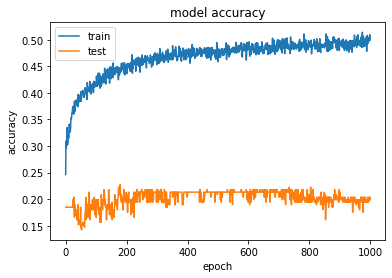

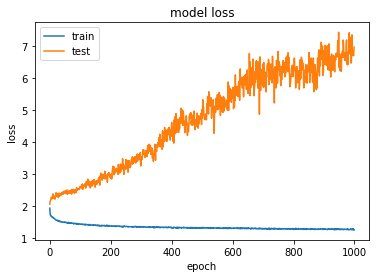

In [8]:
import matplotlib.pyplot as plt

which_split = num_splits - 1
# summarize history for accuracy
plt.plot(all_history[which_split].history['accuracy'])
plt.plot(all_history[which_split].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(all_history[which_split].history['loss'])
plt.plot(all_history[which_split].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
print(np.mean(all_history[which_split].history['accuracy']))
print(np.mean(all_history[which_split].history['val_accuracy']))
print(np.mean(all_history[which_split].history['loss']))
print(np.mean(all_history[which_split].history['val_loss']))

0.46594235837459563
0.2018530816435814
1.3304782853126527
4.7171737971305845


In [10]:
print(all_history[which_split].history['accuracy'][999])
print(all_history[which_split].history['val_accuracy'][999])
print(all_history[which_split].history['loss'][999])
print(all_history[which_split].history['val_loss'][999])

0.49867793917655945
0.1990521401166916
1.2440412044525146
6.9786810874938965
